# German Credit data Exploration and Prediction

This Analysis can be divided into 6 parts:

1.Data Loading

2.Data Exploration

3.Data Preprocessing

4.Model Selection

5.Model Evaluation

6.Conclusion

We will start with Loading the required Libraries and methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree  import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from collections import OrderedDict
from sklearn import preprocessing 
from sklearn.cluster import KMeans


In [2]:
def groupby_requirement(file, column, value):
    grouped_data = file.groupby([column]).get_group(value)
    length = len(grouped_data)
    return grouped_data , length


In [3]:
def age_count(file):
    young = 0
    old = 0 
    for i in file['Age']:
        if i <= 30:
            young += 1
        else:
            old += 1
    return young, old

In [4]:
def GridSCV_check(Classifier, parameters, X_train, y_train, X_test, y_test):
    #clf = RandomForestClassifier()
    #parameters = {"max_depth" : [1,10,100], 
    #              "min_samples_split" : [6, 8, 10, 12], 
    #              "min_samples_leaf" : [3,4,5]}
    clf = Classifier
    #fbeta_score scoring object using make_scorer()
    scorer = make_scorer(fbeta_score, beta=2)
    #Grid search on the classifier
    grid_obj = GridSearchCV(clf, parameters, scoring = scorer)
    #Fit the grid search object to the training data
    grid_fit = grid_obj.fit(X_train, y_train)
    # Get the estimator
    best_clf = grid_fit.best_estimator_
    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
    return None

In [5]:
def plot_graph(C1, C2, R1, R2, I1, I2, N1, N2):
    study_dataframe = pd.DataFrame(                         
        data={N1:[C1, C2],
              N2:[R1, R2]},
        index=[I1, I2])
    study_dataframe.plot.bar(alpha=0.7)
    plt.ylabel("Total Count")
    return None

# 1. Data Loading
First we will load the data from the german.data provided by UCI. The Column value are hardcoded as they are not present in the dataset

In [6]:
file =pd.read_csv("../GermanData_Credit (1).csv")
file.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [7]:
columns = ['Existing account', 
           'Duration month', 
           'Credit history',
           'Purpose',
           'Credit amount',
           'Saving',
           'Employment duration',
           'Installment rate',
           'Personal status',
           'Debtors',
           'Residential Duration',
           'Property',
           'Age',
           'Installment plans',
           'Housing',
           'Number of credits',
           'Job',
           'Liable People',
           'Telephone',
           'Foreign worker',
           'Classification']
file.columns = columns
file.head()

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,...,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker,Classification
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [8]:
file.shape

(999, 21)

In [9]:
file.dtypes

Existing account        object
Duration month           int64
Credit history          object
Purpose                 object
Credit amount            int64
Saving                  object
Employment duration     object
Installment rate         int64
Personal status         object
Debtors                 object
Residential Duration     int64
Property                object
Age                      int64
Installment plans       object
Housing                 object
Number of credits        int64
Job                     object
Liable People            int64
Telephone               object
Foreign worker          object
Classification           int64
dtype: object

In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Existing account      999 non-null    object
 1   Duration month        999 non-null    int64 
 2   Credit history        999 non-null    object
 3   Purpose               999 non-null    object
 4   Credit amount         999 non-null    int64 
 5   Saving                999 non-null    object
 6   Employment duration   999 non-null    object
 7   Installment rate      999 non-null    int64 
 8   Personal status       999 non-null    object
 9   Debtors               999 non-null    object
 10  Residential Duration  999 non-null    int64 
 11  Property              999 non-null    object
 12  Age                   999 non-null    int64 
 13  Installment plans     999 non-null    object
 14  Housing               999 non-null    object
 15  Number of credits     999 non-null    in

In [11]:
file.describe().round(2).style.background_gradient()

,Duration month,Credit amount,Installment rate,Residential Duration,Age,Number of credits,Liable People,Classification
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.920000,3273.360000,2.970000,2.840000,35.510000,1.410000,1.160000,1.300000
std,12.060000,2823.370000,1.120000,1.100000,11.340000,0.580000,0.360000,0.460000
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [12]:
#Checking if there are any missing values

In [13]:
file.isnull().sum()

Existing account        0
Duration month          0
Credit history          0
Purpose                 0
Credit amount           0
Saving                  0
Employment duration     0
Installment rate        0
Personal status         0
Debtors                 0
Residential Duration    0
Property                0
Age                     0
Installment plans       0
Housing                 0
Number of credits       0
Job                     0
Liable People           0
Telephone               0
Foreign worker          0
Classification          0
dtype: int64

In [14]:
#Checking if there are any duplicate values
file.duplicated().sum()

0

In [15]:
#Let us do some basic exploration amount the number of 
classification_count = file.groupby('Classification').count()
classification_count['Existing account']

Classification
1    699
2    300
Name: Existing account, dtype: int64

<AxesSubplot:xlabel='Classification', ylabel='count'>

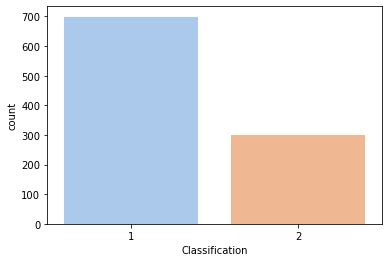

In [16]:
sns.countplot(x="Classification",data=file,palette="pastel")

([<matplotlib.patches.Wedge at 0x192c9136490>,
 [Text(-0.8905282793117132, -0.645723922234665, '1'),
  Text(0.8905282793117135, 0.6457239222346645, '2')],
 [Text(-0.4857426978063889, -0.3522130484916354, '70.0%'),
  Text(0.4857426978063891, 0.3522130484916351, '30.0%')])

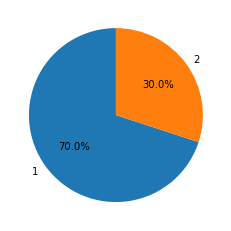

In [17]:
df_pie=pd.DataFrame(classification_count)
df_pie.reset_index(inplace=True)
#plt.pie(df_pie['name'], labels=df_pie['mfr'])
plt.pie(df_pie['Existing account'], labels=df_pie['Classification'], autopct='%1.1f%%', startangle=90)

# 2. Data Exploration
Now we will try to do some data exploration to find meaningful information and along with that will answer the questions asked in the problem statement

In [18]:
# We will group Customers according to their classifications First
good_customers, good_customer_length = groupby_requirement(file, 'Classification', 1)
bad_customers, bad_customer_length = groupby_requirement(file, 'Classification', 2)

# Now let us try to see each group separately
good_critical_customers , good_critical_customers_length =  groupby_requirement(good_customers, 'Credit history','A34')
bad_critical_customers , bad_critical_customers_length= groupby_requirement(bad_customers, 'Credit history','A34')

# Let us try to find the percentage of Customers with Critical Credit history with 
# their respective groups
to_print_value = ((good_critical_customers_length/good_customer_length)*100)
print ('Percentage of Good customers with Critical credit History : {}'.format(to_print_value))
to_print_value = ((bad_critical_customers_length/ bad_customer_length)*100)
print ('Percentage of Bad customers with Critical credit History : {}'.format(to_print_value))

# This will print the percentage Good customers with Critical History with 
# respect to all Customers with Critical History
to_print_value =  ((good_critical_customers_length /
                   (good_critical_customers_length + bad_critical_customers_length)) * 100)
print ('Percentage of Good customers with critical credit history out of all customers '
       'with critical credit history : {}'.format(to_print_value))

Percentage of Good customers with Critical credit History : 34.620886981402
Percentage of Bad customers with Critical credit History : 16.666666666666664
Percentage of Good customers with critical credit history out of all customers with critical credit history : 82.87671232876713


In [19]:
cols = ['Existing account',  
           'Credit history',
           ]
#
# Encode labels of multiple columns at once
#
file[cols] = file[cols].apply(preprocessing.LabelEncoder().fit_transform)
#
# Print head

file.head()
#my_label = preprocessing.LabelEncoder() 
#my_label.fit(file[ 'Existing account' ])
#le_name_mapping = dict(zip(my_label.classes_, my_label.transform(my_label.classes_)))
#print(le_name_mapping)

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,...,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker,Classification
0,1,48,2,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,3,12,4,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,0,42,2,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,0,24,3,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,3,36,2,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


C:\Users\hp\AppData\Local\Temp\ipykernel_9136\1326289010.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

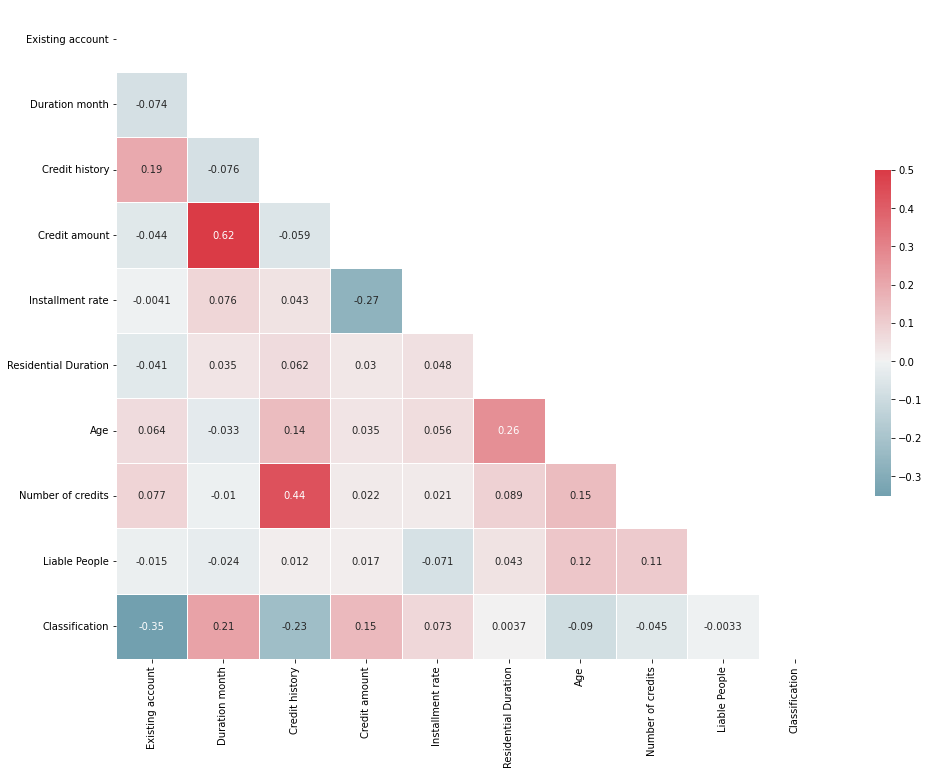

In [20]:
corr=file.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

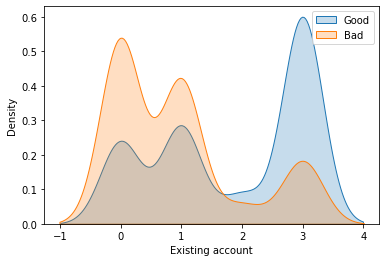

In [21]:

plt.figure(figsize=(6,4))
sns.kdeplot(data=file[file['Classification'] == 1]['Existing account'], label="Good", shade=True)
sns.kdeplot(data=file[file['Classification'] == 2]['Existing account'], label="Bad", shade=True)
plt.legend()
plt.show()
#file.head()
#pd.Categorical( file('Existing account'),['A11', 'A12', 'A13','A14']  ).labels
#print(my_label.classes_)'''

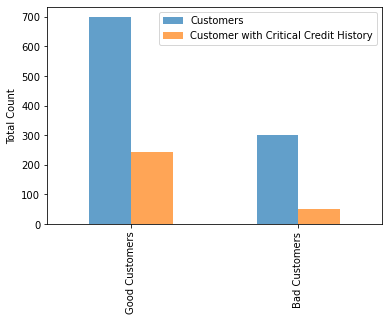

In [22]:
plot_graph(good_customer_length,
           bad_customer_length, 
           good_critical_customers_length, 
           bad_critical_customers_length,
           'Good Customers', 
           'Bad Customers',
           'Customers',
           'Customer with Critical Credit History')

# Would a person with critical credit history, be more credit worthy?
Here we can see that one of every three good customers have a Critical Credit History. On the other hand, one of every six bad customers have Critical Credit History. Also 4 out of 5 Customers with Critical Credit History are good customers.

So here we can infer that Yes, Critical Credit History indicates that a customer is more Credit worthy.

In [23]:
# Here will be categorize good customer according to the age
young_good_customers, old_good_customers = age_count(good_customers)
to_print_value = ((young_good_customers / ( young_good_customers + old_good_customers)) * 100)
print ('Percentage of good young customers out of all good customers : {}'.format(to_print_value))

# Here will be categorize bad customer according to the age
young_bad_customers , old_bad_customers = age_count(bad_customers)
to_print_value =((young_bad_customers / ( young_bad_customers + old_bad_customers)) * 100)
print ('Percentage of bad young customers out of all bad customers : {}'.format(to_print_value))

# Here try to find that what percentage of young customers are good
to_print_value = ((young_good_customers / (young_good_customers + young_bad_customers) )* 100)
print ('Percentage of good young customers out of all young customers : {}'.format(to_print_value))
# Here try to find that what percentage of old customers are good
to_print_value = ((old_good_customers / (old_good_customers + old_bad_customers) )* 100)
print ('Percentage of good old customers out of all old customers : {}'.format(to_print_value))

Percentage of good young customers out of all good customers : 37.625178826895564
Percentage of bad young customers out of all bad customers : 49.333333333333336
Percentage of good young customers out of all young customers : 63.990267639902676
Percentage of good old customers out of all old customers : 74.14965986394559


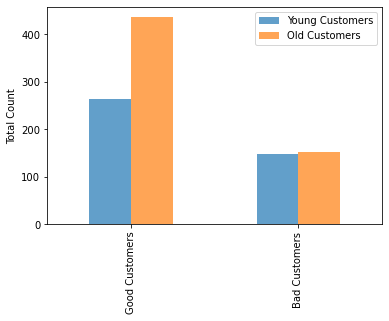

In [24]:
plot_graph(young_good_customers, 
           young_bad_customers,
           old_good_customers,
           old_bad_customers,
           'Good Customers',
           'Bad Customers',
           'Young Customers',
           'Old Customers'
           )

# Are young people more credit worthy?
Here we can see that 3 out of 4 Old Customers are Credit Worthy. On the other hand, 6 of every 10 young customers credit worthy. Also there is 50% chance that if the customer is categorised as bad customer then he/she is young.

So here we can infer that Old customers are more credit worthy than young people.

In [25]:
# Let us see how many distinct values are present for number of Credits column
num = set(good_customers['Number of credits'])
print(num)

{1, 2, 3, 4}


In [26]:
good_customers_with_3_credits, good_3_credit = groupby_requirement(good_customers, 'Number of credits', 3)
good_customers_with_4_credits, good_4_credit = groupby_requirement(good_customers, 'Number of credits', 4)

customers_with_3_credits, all_3_credit = groupby_requirement(file, 'Number of credits', 3)
customers_with_4_credits, all_4_credit = groupby_requirement(file, 'Number of credits', 4)

((good_3_credit + good_4_credit)/(all_3_credit + all_4_credit))*100
to_print_value = (((good_3_credit + good_4_credit)/(all_3_credit + all_4_credit))*100)
print ('Percentage of good customers with more than 3 credit accounts '
       'out of all customers with more that 3 credit accounts: {}'.format(to_print_value))

Percentage of good customers with more than 3 credit accounts out of all customers with more that 3 credit accounts: 76.47058823529412


# Would a person with more credit accounts, be more credit worthy?
Here we can see that 3 out of 4 good customer have more than 2 credit accounts.

So here we can infer that Customers with more than 2 credits accounts are credit worthy.

C:\Learning\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Learning\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Learning\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Learning\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


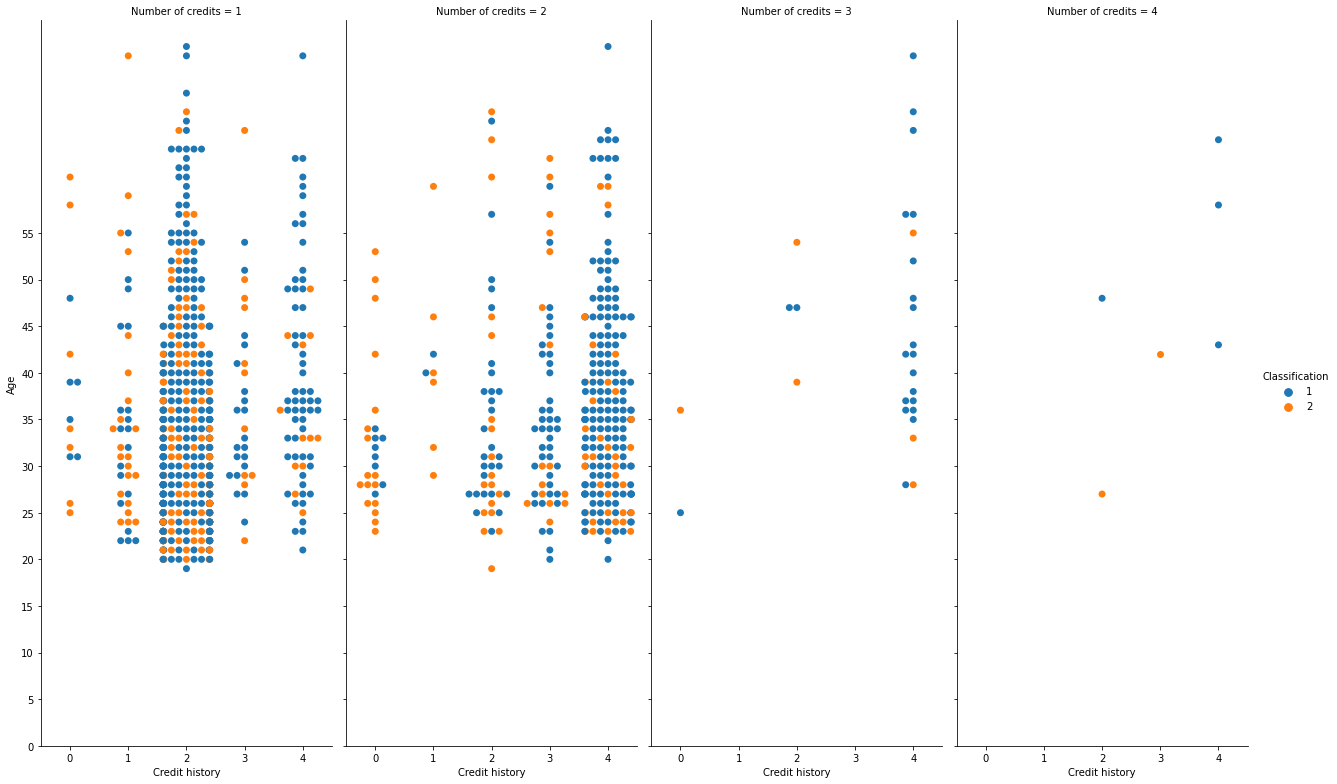

In [27]:
sns.factorplot(data=file, 
               col='Number of credits', 
               x='Credit history', 
               y='Age', 
               hue='Classification', 
               kind='swarm', size=11, aspect=0.4, s=7)
plt.yticks(np.arange(0,60,5));

# Take away points from the graph above:
More the number of Credit accounts more the probabilility of Credit worthiness

Critical credit History depict higher credit worthiness

Anyone with two credit accounts with critical credit history(A34) and between the age 31 to 65 has high likelyhood of high credit worthiness

# 3. Data Preprocessing

In [28]:
#Separating Data from the Label
label = file['Classification']
customers = file.drop('Classification', axis = 1)
numeric_columns = file.describe().columns

C:\Learning\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

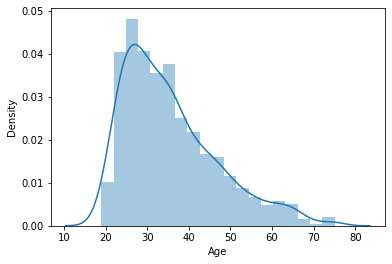

In [29]:
sns.distplot(file['Age'])

The plot above is right skewed with one peak

C:\Learning\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

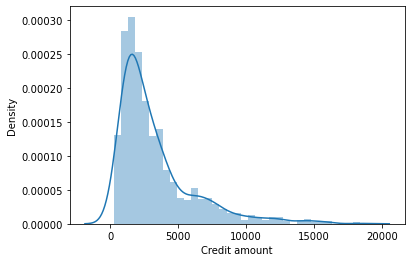

In [30]:
sns.distplot(customers['Credit amount'])

The plot above is also right skewed

C:\Learning\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration month', ylabel='Density'>

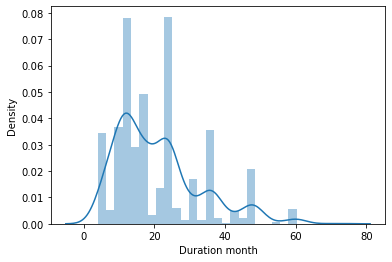

In [31]:
sns.distplot(customers['Duration month'])

The plot above is also right skewed with multiple peaks

# 3.1 Logarithmic Transform
As noticed above there are columns with Skewed data. So we will preform Logarithmic transform to reduce the impact of very large or very small values on the learning Algorithm

In [32]:
# Here we will perform Log transform of all the numeric columns of create a redistributed graph
customers_log_transformed = file.copy()
customers_log_transformed[numeric_columns] = file[numeric_columns].apply(lambda x: np.log(x + 1))
customers_log_transformed

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,...,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker,Classification
0,0.693147,3.891820,1.098612,A43,8.691483,A61,A73,1.098612,A92,A101,...,A121,3.135494,A143,A152,0.693147,A173,0.693147,A191,A201,1.098612
1,1.386294,2.564949,1.609438,A46,7.648263,A61,A74,1.098612,A93,A101,...,A121,3.912023,A143,A152,0.693147,A172,1.098612,A191,A201,0.693147
2,0.000000,3.761200,1.098612,A42,8.972464,A61,A74,1.098612,A93,A103,...,A122,3.828641,A143,A153,0.693147,A173,1.098612,A191,A201,0.693147
3,0.000000,3.218876,1.386294,A40,8.491055,A61,A73,1.386294,A93,A101,...,A124,3.988984,A143,A153,1.098612,A173,1.098612,A191,A201,1.098612
4,1.386294,3.610918,1.098612,A46,9.111183,A65,A73,1.098612,A93,A101,...,A124,3.583519,A143,A153,0.693147,A172,1.098612,A192,A201,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.386294,2.564949,1.098612,A42,7.459915,A61,A74,1.386294,A92,A101,...,A121,3.465736,A143,A152,0.693147,A172,0.693147,A191,A201,0.693147
995,0.000000,3.433987,1.098612,A41,8.257904,A61,A73,1.609438,A91,A101,...,A122,3.713572,A143,A152,0.693147,A174,0.693147,A192,A201,0.693147
996,1.386294,2.564949,1.098612,A43,6.690842,A61,A75,1.609438,A93,A101,...,A123,3.663562,A143,A152,0.693147,A173,0.693147,A191,A201,0.693147
997,0.000000,3.828641,1.098612,A43,7.520776,A61,A73,1.609438,A93,A101,...,A124,3.178054,A143,A153,0.693147,A173,0.693147,A192,A201,1.098612


Now let us Pairplot again to check if the distribution has been normalized

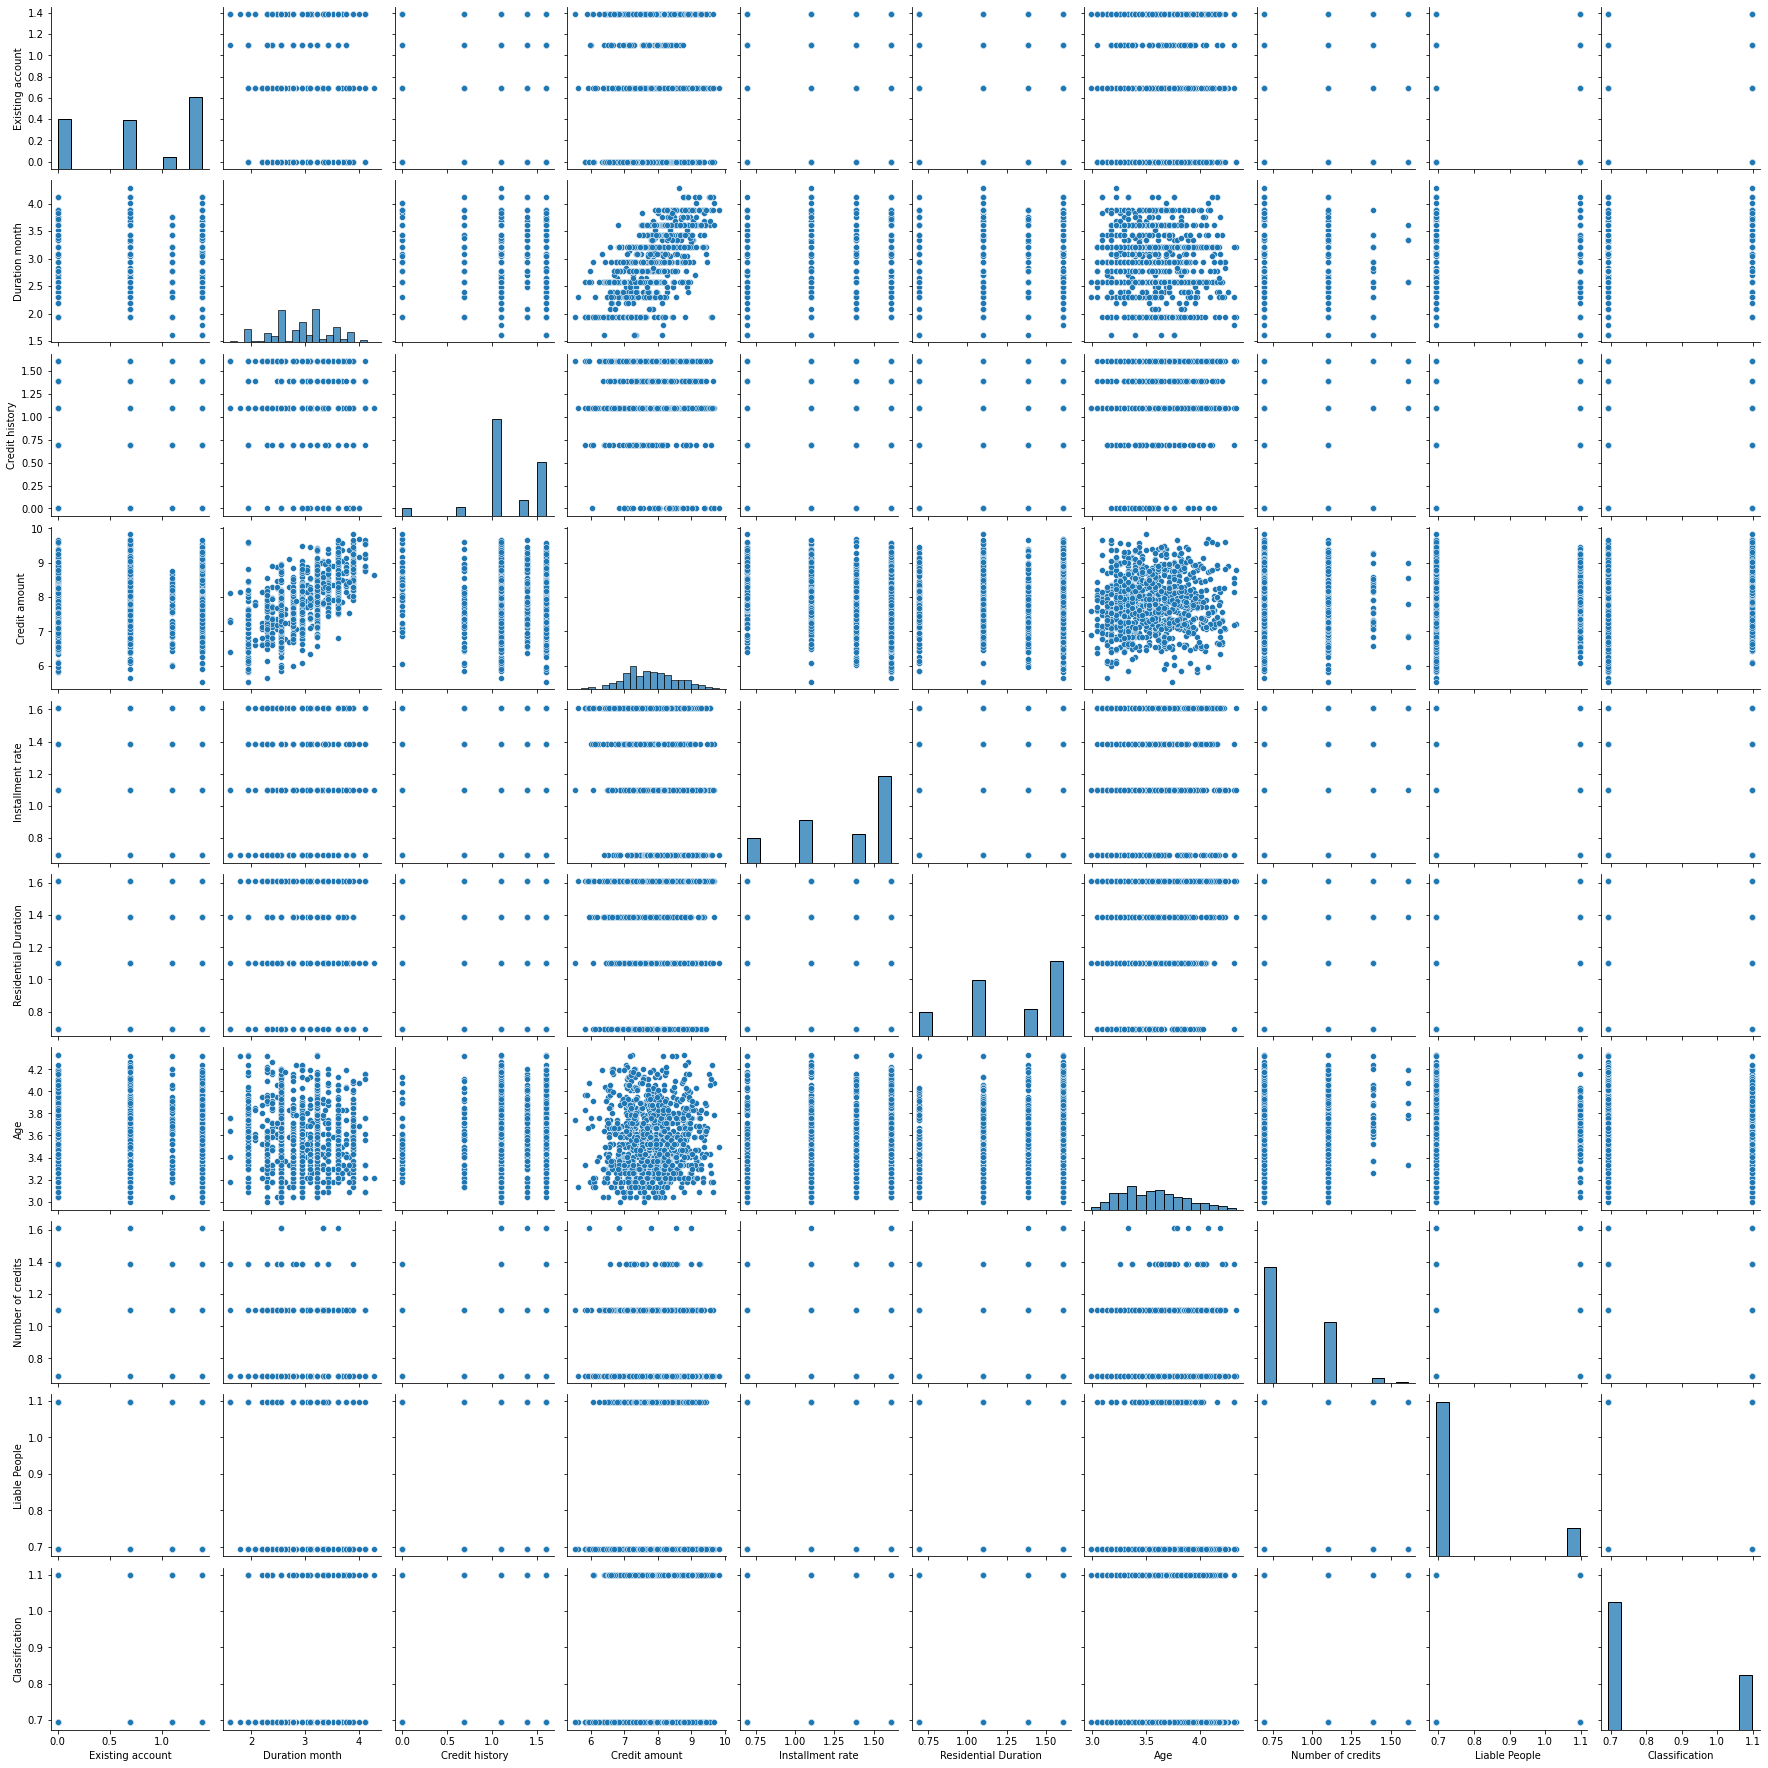

In [33]:
sns.pairplot(customers_log_transformed[numeric_columns])

# 3.2 Min Max Scaling
As there are numeric values present in the data we will perform Min Max Scaling to normalize the data. There is another way of doing this know as Standard Scaling which uses Mean and Standard deviation to produce the normalized data

In [34]:
scaler = MinMaxScaler()
customers_scaled_log_transformed = customers_log_transformed.copy()
customers_scaled_log_transformed[numeric_columns] = scaler.fit_transform(customers_scaled_log_transformed[numeric_columns])
customers_scaled_log_transformed

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,...,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker,Classification
0,0.5,0.851311,0.682606,A43,0.736970,A61,A73,0.442507,A92,A101,...,A121,0.104691,A143,A152,0.000000,A173,0.0,A191,A201,1.0
1,1.0,0.356398,1.000000,A46,0.494135,A61,A74,0.442507,A93,A101,...,A121,0.686360,A143,A152,0.000000,A172,1.0,A191,A201,0.0
2,0.0,0.802590,0.682606,A42,0.802375,A61,A74,0.442507,A93,A103,...,A122,0.623901,A143,A153,0.000000,A173,1.0,A191,A201,0.0
3,0.0,0.600308,0.861353,A40,0.690315,A61,A73,0.756471,A93,A101,...,A124,0.744008,A143,A153,0.442507,A173,1.0,A191,A201,1.0
4,1.0,0.746536,0.682606,A46,0.834665,A65,A73,0.442507,A93,A101,...,A124,0.440289,A143,A153,0.000000,A172,1.0,A192,A201,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.0,0.356398,0.682606,A42,0.450293,A61,A74,0.756471,A92,A101,...,A121,0.352062,A143,A152,0.000000,A172,0.0,A191,A201,0.0
995,0.0,0.680543,0.682606,A41,0.636044,A61,A73,1.000000,A91,A101,...,A122,0.537707,A143,A152,0.000000,A174,0.0,A192,A201,0.0
996,1.0,0.356398,0.682606,A43,0.271272,A61,A75,1.000000,A93,A101,...,A123,0.500246,A143,A152,0.000000,A173,0.0,A191,A201,0.0
997,0.0,0.827745,0.682606,A43,0.464460,A61,A73,1.000000,A93,A101,...,A124,0.136570,A143,A153,0.000000,A173,0.0,A192,A201,1.0


# 3.3 One-Hot Encoding Data
As there are a lot of non Numeric (categorical) columns. We will preform One-Hot Encoding to make the data Machine readable. We can also use LabelEncoding to convert Categorical column into machine readable data

In [35]:
customers_final = pd.get_dummies(customers_scaled_log_transformed)

In [36]:
customers_final.columns
customers_final.head()

,Existing account,Duration month,Credit history,Credit amount,Installment rate,Residential Duration,Age,Number of credits,Liable People,Classification,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign worker_A201,Foreign worker_A202
0,0.5,0.851311,0.682606,0.736970,0.442507,0.442507,0.104691,0.000000,0.0,1.0,...,1,0,0,0,1,0,1,0,1,0
1,1.0,0.356398,1.000000,0.494135,0.442507,0.756471,0.686360,0.000000,1.0,0.0,...,1,0,0,1,0,0,1,0,1,0
2,0.0,0.802590,0.682606,0.802375,0.442507,1.000000,0.623901,0.000000,1.0,0.0,...,0,1,0,0,1,0,1,0,1,0
3,0.0,0.600308,0.861353,0.690315,0.756471,1.000000,0.744008,0.442507,1.0,1.0,...,0,1,0,0,1,0,1,0,1,0
4,1.0,0.746536,0.682606,0.834665,0.442507,1.000000,0.440289,0.000000,1.0,0.0,...,0,1,0,1,0,0,0,1,1,0


# 3.4 Splitting the data into Test and Train datasets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(customers_final, 
                                                    label, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# 4. Model Selection
Here we will select 3 models and then will try to find the best model to implement
From all the available supervised learning models we have chosen only 3 :

1.Random Forest Classifier

2.Logistic Regression

3.Support Vector machines

# 4.1 Random Forest Classifier

In [ ]:
# Declaring the Classifier
Randon_forest_clf = RandomForestClassifier()

# Fit the Classifier object on Input data
Random_forest_model = Randon_forest_clf.fit(X_train, y_train)

# Predict the Values on test data
Randon_forest_pred = Random_forest_model.predict(X_test)

# Calculate the Probalities for each Prediction
Randon_forest_proba = Random_forest_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
Random_forest_accuracy = accuracy_score(y_test, Randon_forest_pred)
print(Random_forest_accuracy)

# 4.2 Logistic Regression Classifier

In [ ]:
# Declaring the Classifier
Logistic_regression_clf = LogisticRegression()

# Fit the Classifier object on Input data
Logistic_regression_model = Logistic_regression_clf.fit(X_train, y_train)

# Predict the Values on test data
Logistic_regression_pred = Logistic_regression_model.predict(X_test)

# Calculate the Probalities for each Prediction
Logistic_regression_proba = Logistic_regression_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
Logistic_regression_accuracy = accuracy_score(y_test, Logistic_regression_pred)

# 4.3 Support Vector Machine Classifier

In [ ]:
# Declaring the Classifier
SVC_clf = SVC(kernel = 'linear',probability = True)

# Fit the Classifier object on Input data
SVC_model = SVC_clf.fit(X_train, y_train)

# Predict the Values on test data
SVC_pred = SVC_model.predict(X_test)

# Calculate the Probalities for each Prediction
SVC_proba = SVC_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
SVC_accuracy = accuracy_score(y_test, SVC_pred) 

In [ ]:
print('Accuracy of Random Forest Classifier is {}'.format(Random_forest_accuracy))
print('Accuracy of Logistic Regression Classifier is {}'.format(Logistic_regression_accuracy))
print('Accuracy of Support Vector Machine Classifier is {}'.format(SVC_accuracy))

One thing to keep in our minds is to decide which Matrics to use here. The output here uses a Cost matrix where penalty to have a False Negative is higher than that of False Positive. This means that for a bank the cost to loan a misclassified bad customer is higher than the cost of loan rejected for a good customer. Therefore we will try to Reduce the False Negatives. This actually means we will have to have a large Recall so that False Negatives are minimized.

Cost Matrix

       Good 	Bad
Good	0	     1
Bad	    5	     0
(1 = Good,  2 = Bad)
The rows represent the actual classification and the columns the predicted classification.
So to evaluate the models to have large recall we will use Fbeta Score. Formula for Fbeta Score is ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall). Here when the value of beta is greater that '1' , it will weight more attention on Recall than Precision. Therefore we will use beta as '2'.

In [ ]:
#Now Calculating Fbeta Score 
Random_forest_fbeta = fbeta_score(y_test, Randon_forest_pred, beta = 2)
Logistic_regression_fbeta = fbeta_score(y_test, Logistic_regression_pred, beta = 2)
SVC_fbeta = fbeta_score(y_test, SVC_pred, beta = 2)

In [ ]:
print('Fbeta Score of Random Forest Classifier is {}'.format(Random_forest_fbeta))
print('Fbeta Score of Logistic Regression Classifier is {}'.format(Logistic_regression_fbeta))
print('Fbeta Score of Support Vector Machine Classifier is {}'.format(SVC_fbeta))

# 5. Model Evaluation
#ROC Curve
We can see here that the Fbeta score Random Forest has is better than the other two. While the Accuracy of Logistic Regression is better. So we will Drop SVM algorithm and try to find the best from Random Forest and Logistic Regression.

To do that we will plot the ROC curve to see which one is consistant

In [ ]:
rf_probs = Randon_forest_proba[:,1]
lr_probs = Logistic_regression_proba[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label=2)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=2)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_label = str('Logistic ROC curve (area = {})'.format(int(lr_auc*100)))
rf_label = str('Random Forest ROC curve (area = {})'.format(int(rf_auc*100)))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label=lr_label)
plt.plot(rf_fpr, rf_tpr, marker='.', label=rf_label)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print (rf_auc)
print (lr_auc)
plt.legend()
plt.show()